In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")

<Axes: >

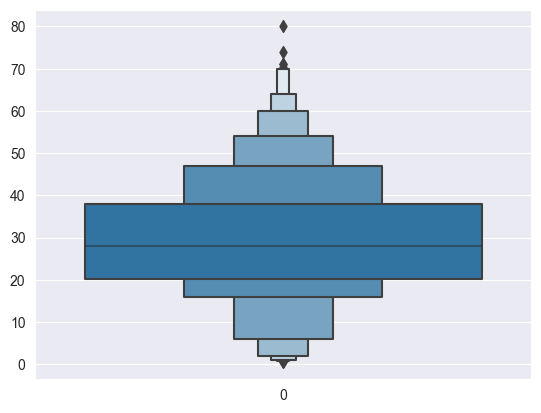

In [2]:
sns.boxenplot(titanic.age)
# sns.histplot(titanic.age)

<Axes: xlabel='age', ylabel='Count'>

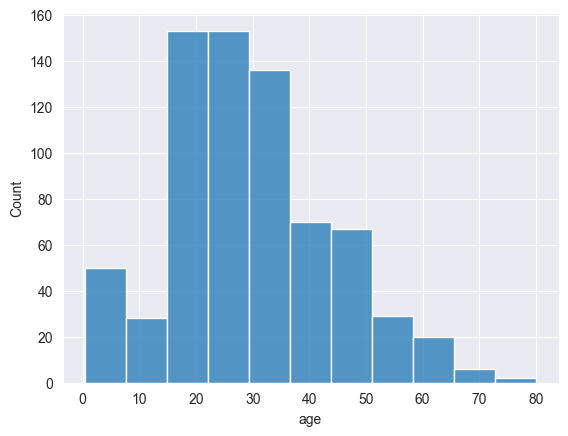

In [3]:
# sns.histplot(titanic.age, kde=True)  # kde参数会画出密度函数
sns.histplot(titanic.age, bins=11)  # bins参数是柱子的数量


<Axes: xlabel='pclass', ylabel='count'>

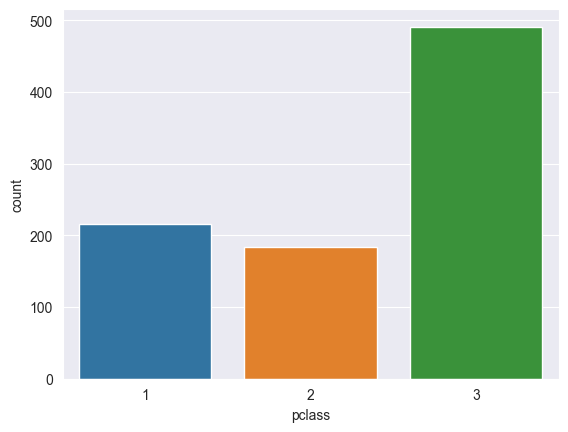

In [4]:
sns.countplot(x=titanic.pclass)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

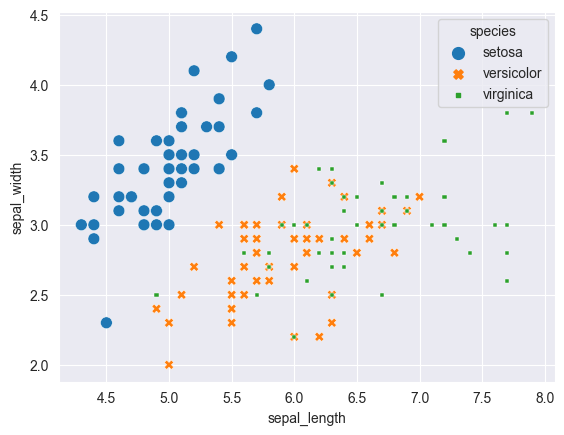

In [5]:
sns.scatterplot(data=iris,x=iris.sepal_length, y=iris.sepal_width, hue="species",style="species",size="species")
# hue参数用于颜色分类，style区分标记点的样式，size用于区分标记点的大小

C:\Users\kimim\AppData\Local\Temp\ipykernel_4816\1392476665.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.corr()


<Axes: >

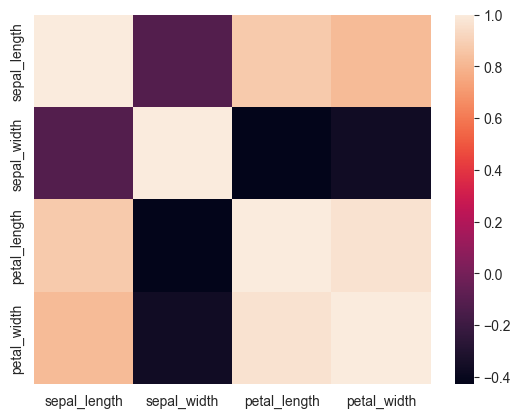

In [6]:
corr = iris.corr()
sns.heatmap(corr)

<Axes: xlabel='species', ylabel='sepal_length'>

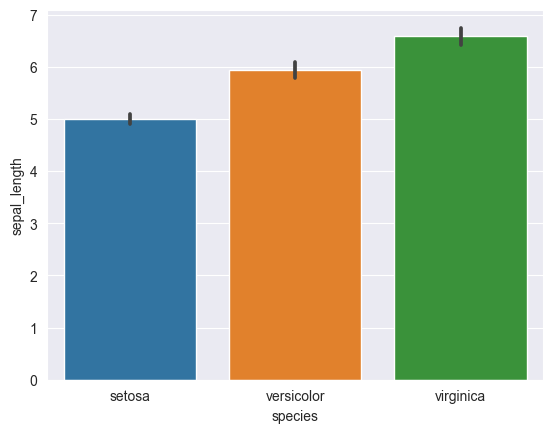

In [7]:
sns.barplot(data=iris,y=iris.sepal_length,x=iris.species)

<Axes: xlabel='species', ylabel='sepal_length'>

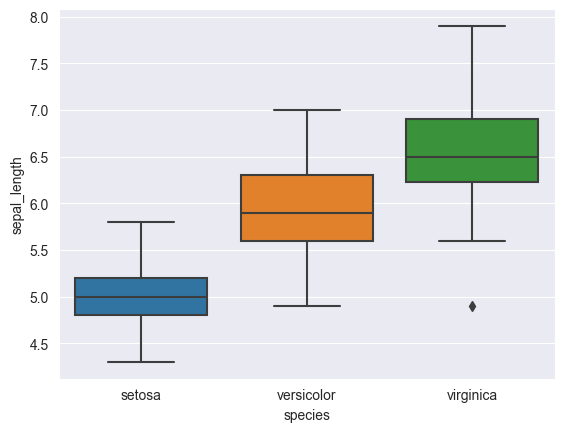

In [8]:
sns.boxplot(data=iris,y=iris.sepal_length,x=iris.species)

<Axes: xlabel='pclass', ylabel='count'>

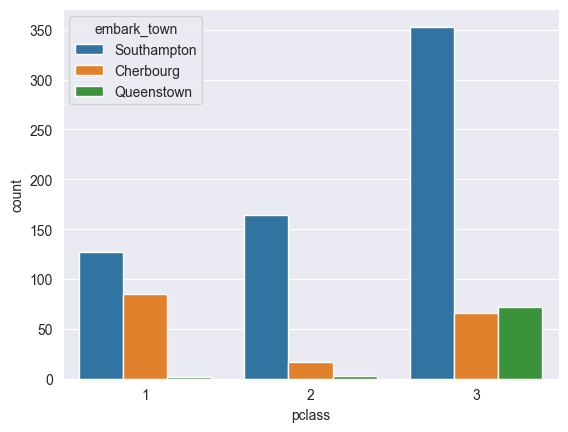

In [9]:
sns.countplot(data=titanic,x=titanic.pclass,hue=titanic.embark_town)
# titanic

<Axes: xlabel='pclass', ylabel='count'>

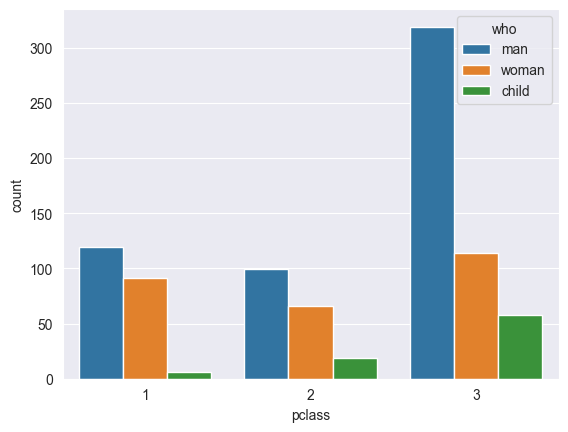

In [10]:
sns.countplot(data=titanic, x=titanic.pclass, hue=titanic.who)

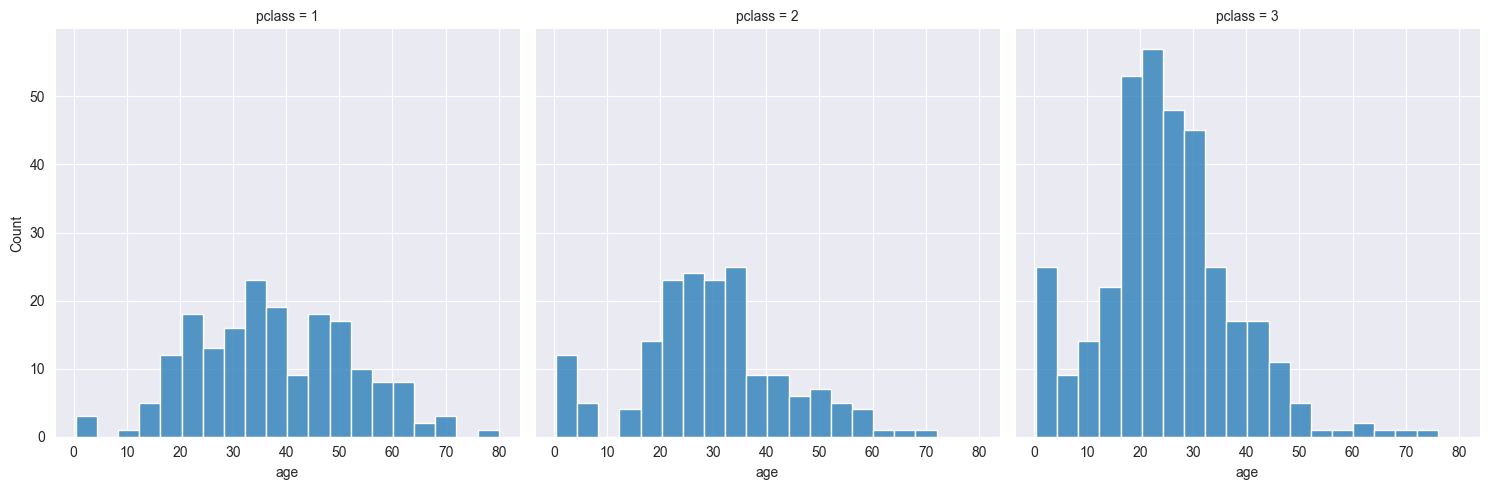

In [11]:
sns.displot(data=titanic, x=titanic.age, col=titanic.pclass, kind="hist")  # col参数先将数据分类后再画图

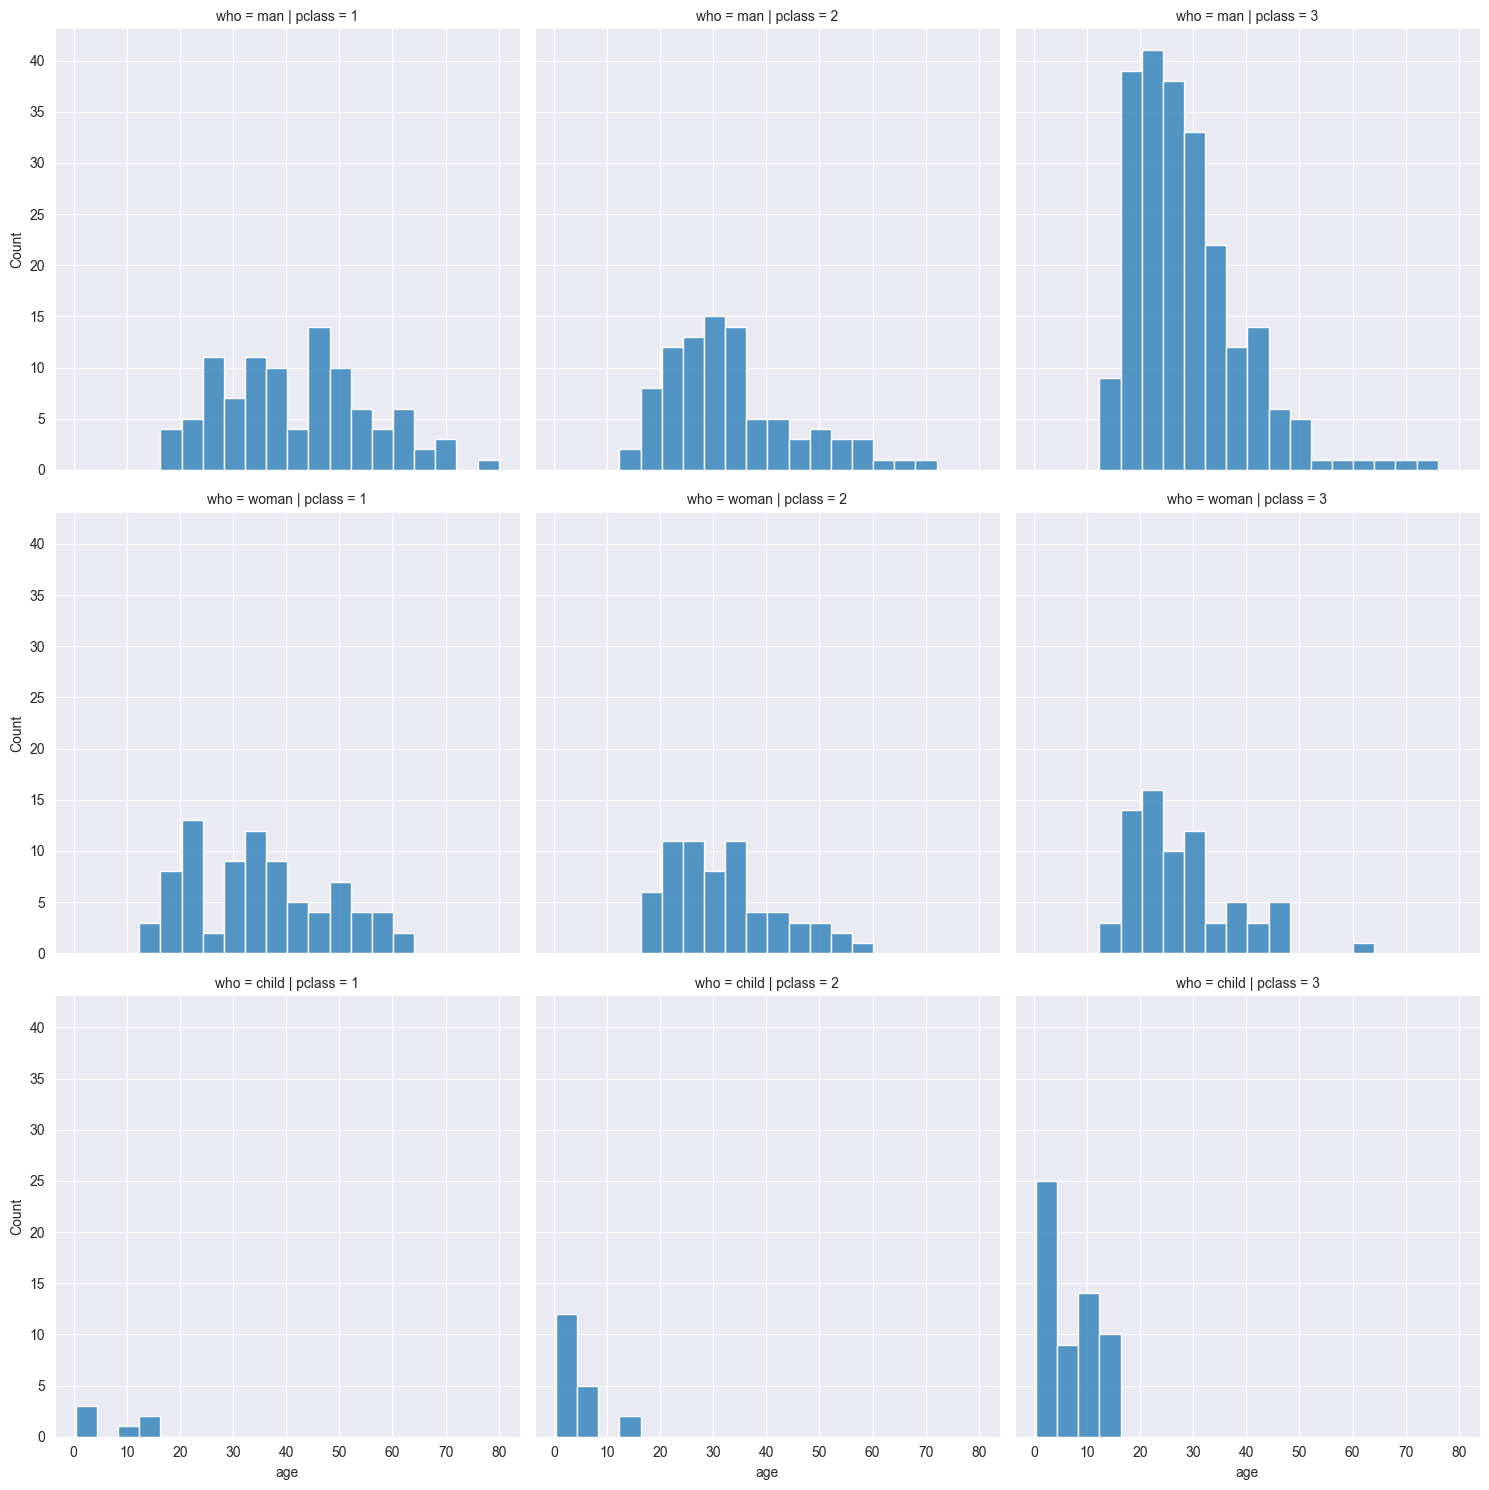

In [12]:
sns.displot(data=titanic, x=titanic.age, col=titanic.pclass,row=titanic.who, kind="hist")

In [13]:
import pandas as pd
X = pd.read_csv("data/sy02-p2019.csv",na_values="ABS")  # na_values用于指定需要转变为Nan的具体数据的值
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dernier diplôme obtenu  199 non-null    object 
 1   Branche                 199 non-null    object 
 2   Semestre                199 non-null    int64  
 3   Correcteur médian       194 non-null    object 
 4   Note médian             194 non-null    float64
 5   Note TP                 189 non-null    float64
 6   Correcteur final        191 non-null    object 
 7   Note final              190 non-null    float64
 8   Note ECTS               194 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 14.1+ KB


<Axes: xlabel='Branche', ylabel='count'>

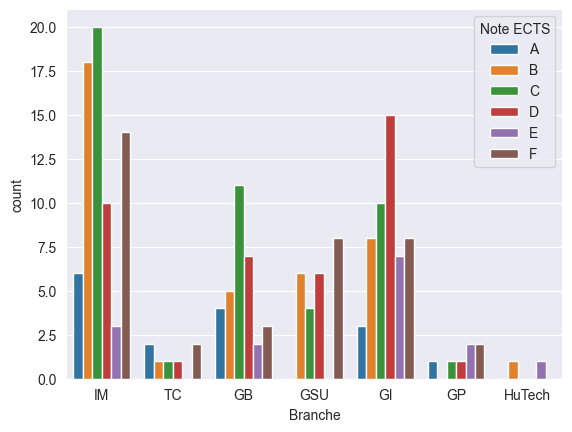

In [14]:
# sns.countplot(data=X,x=X.Branche,hue=X.Semestre)
X["Note ECTS"] = pd.Categorical(X["Note ECTS"], ordered=True)
sns.countplot(data=X,x=X.Branche,hue="Note ECTS")

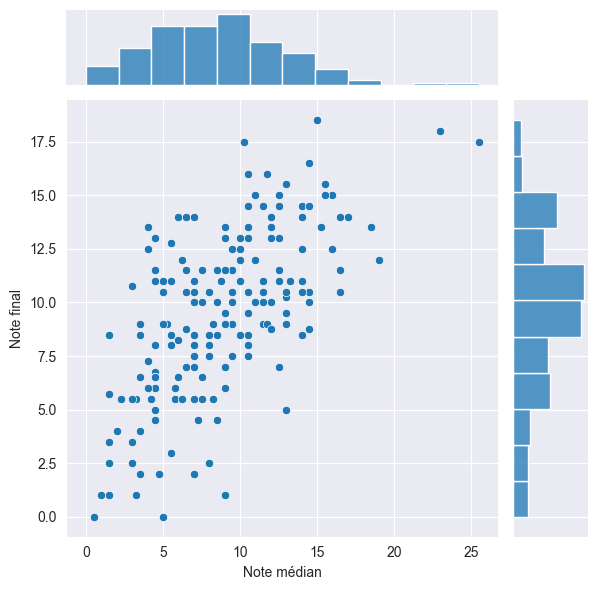

In [15]:
# sns.scatterplot(x="Note médian", y="Note final", data=X)
sns.jointplot(x="Note médian", y="Note final", data=X)  # 高级版

$P(x<=X<=x+h)$

<Axes: xlabel='Type', ylabel='Note'>

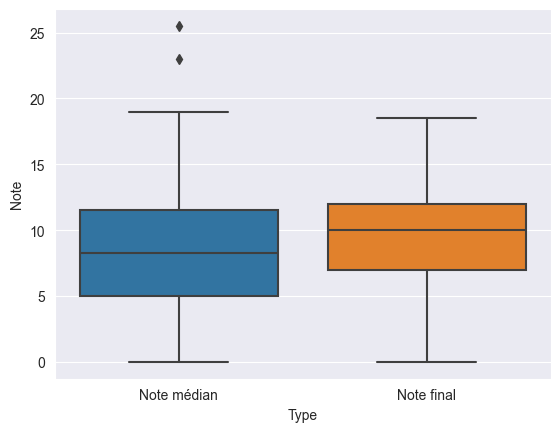

In [16]:
X1 = X.melt(value_vars=["Note médian", "Note final"], var_name="Type", value_name="Note")
sns.boxplot(data=X1,x="Type",y="Note")

<Axes: xlabel='Correcteur', ylabel='count'>

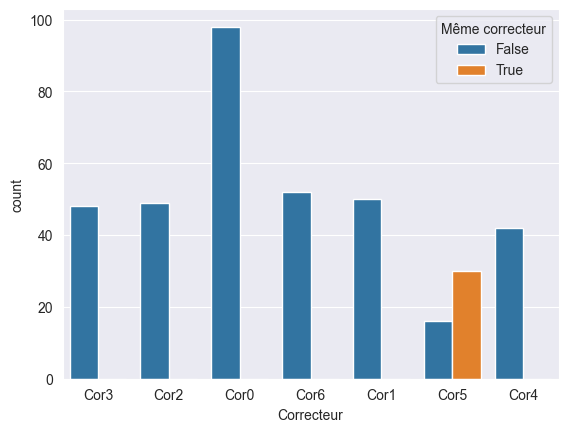

In [17]:
X["Même correcteur"] = X["Correcteur médian"] == X["Correcteur final"]
X1 = X.melt(
    id_vars=["Même correcteur"],
    value_vars=["Correcteur final", "Correcteur médian"],
    var_name="Examen",
    value_name="Correcteur",
)
sns.countplot(x="Correcteur", hue="Même correcteur", data=X1)

<Axes: xlabel='Correcteur', ylabel='count'>

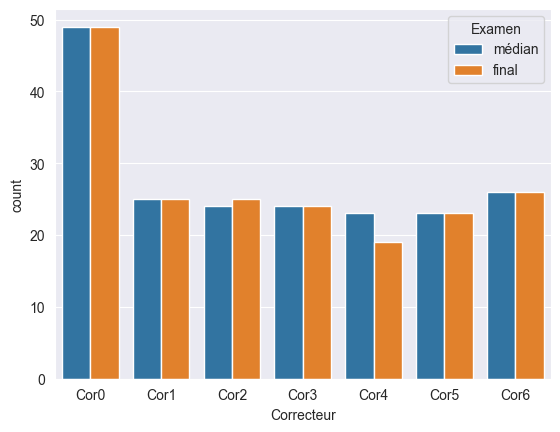

In [18]:
# 答案代码，但感觉比较麻烦
import numpy as np
X1 = X.rename(columns={"Correcteur médian": "médian", "Correcteur final": "final"})
X1 = X1.melt(
    id_vars=["Note médian", "Note final"],
    value_vars=["médian", "final"],
    var_name="Examen",
    value_name="Correcteur",
)
X1["Note"] = np.where(X1["Examen"] == "médian", X1["Note médian"],X1["Note final"])
X1 = X1.drop(columns=["Note médian", "Note final"])
sns.countplot(x="Correcteur", hue="Examen", data=X1)

<Axes: xlabel='Cor', ylabel='count'>

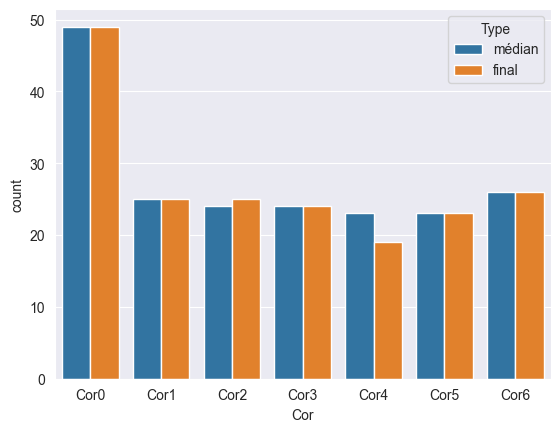

In [19]:
# 明显我这个简单
X1 = X.melt(value_vars=["Correcteur final","Correcteur médian"], value_name="Cor", var_name="Type")
X1 = X1.sort_values(by=["Cor"])
sns.countplot(data=X1,x=X1.Cor,hue=X1.Type.str[11:])